### Projet: MLops  

#### GROUPE : 

**-- AZIABLE Etsé** 

**-- COULIBALY Kiyali**

**-- TUNGAMWESE Carlène**

#### Contexte :
Les institutions financières doivent évaluer le risque de défaut de paiement des prêts.
Des prévisions précises peuvent aider à prendre des décisions de prêt éclairées.
L'apprentissage automatique peut analyser les données historiques pour prédire les défauts de paiement.

#### Objectif :
Créer un modèle permettant de prédire si un prêt sera en défaut de paiement en fonction des données du demandeur.
Identifier les facteurs les plus importants contribuant aux défauts de paiement.

#### Défis :
Gérer des ensembles de données déséquilibrés où les valeurs positives(**Default = oui**) sont moins fréquentes.

##### Approche

1. **Exploration des données**
   - Analyser la distribution des variables.
   - Comprendre la relation entre les variables indépendantes et la variable dépendante (**Default**) : stat descriptives(Uni et bivariées).

2. **Prétraitement des données**
   - Gérer les valeurs manquantes.
   - Encoder les variables catégorielles.
   - Normaliser/standardiser les variables numériques.
   

3. **Fractionnement des données**
   - Divisez l'ensemble de données en ensembles d'entraînement et de test.
   - Utiliser des méthodes de ré-echantillonnages (StratifiedKFold)

4. **Modélisation**
   - Les algorithmes d'apprentissage automatique utilisés : 
    ---> Régression logistique 
    ---> XGBoost.

5. **Évaluation des modèles**
   
   ---> le Recall  Accuracy, La Précision, Le F1_score
   
   ---> La Matrice de confusion AUC-ROC
   

6. **Interprétation des résultats**
   - Identifier les variables les plus importantes pour prédire le risque de crédit.
   - Analyser les tendances et les informations obtenues à partir du modèle.


#### Résultats attendus (Après la mise en production)

- Réduction du taux de défaut en identifiant les clients à haut risque avant d'accorder le crédit.
- Augmentation de l'efficacité et la précision de l'évaluation du risque de crédit.
- Fournir des informations précieuses qui peuvent être utilisées pour améliorer les politiques et stratégies de crédit.

### Choix des métriques pour l'évaluation des modèles

Le choix de ou des métrices d'evaluation va dependre de: 

**Coût et impact des erreurs** : Evaluation du  coût associé aux différentes erreurs (faux positifs et faux négatifs). 

Un faux négatif (ne pas détecter un défaut réel) pourrait être beaucoup plus coûteux qu'un faux positif (prédire un défaut qui n'existe pas) et vice versa.

Le **recall** (sensibilité): c'est une métrique d'évaluation cruciale dans un projet de machine learning visant à prédire le défaut de remboursement d'un prêt. Il mesure la proportion de véritables cas positifs (les défauts de remboursement) qui sont correctement identifiés par le modèle.

Dans le contexte de prédiction de défaut de remboursement, il est souvent très important de détecter un maximum de ces défauts pour éviter des pertes financières la structure. 
Un faible recall signifierait que le modèle manque beaucoup de cas où le client fait réellement défaut, ce qui pourrait entraîner des décisions de prêt risquées et potentiellement des pertes importantes.

Ainsi, en utilisant le recall comme métrique d'évaluation, on s'assure que le modèle est bien calibré pour détecter le plus grand nombre possible de cas à risque (défauts), même si cela signifie accepter un certain nombre de fausses alertes (faux positifs).


Cependant l'utisation du **recall** comme seule métrique d'évaluation performance de notre modèle peut s'avéré insuffisant pour diverse raisons: 


1. **Fausses alertes (faux positifs)** : Un modèle avec un recall très élevé peut marquer beaucoup de prêts comme à risque (défaut potentiel) pour maximiser la détection des défauts réels. Cela pourrait entraîner un grand nombre de faux positifs, c'est-à-dire des cas où le modèle prédit un défaut alors que le prêt est en fait remboursé correctement. Cela peut causer des opportunités manquées et des décisions trop conservatrices.

2. **Précision (precision)** : En complément du recall, la précision mesure la proportion de prédictions positives qui sont réellement correctes. Un modèle équilibré doit non seulement détecter les défauts, mais aussi minimiser le nombre de faux positifs. Une faible précision pourrait signifier que le modèle est inutilement pessimiste.

3. **F1-Score** : Le F1-score combine à la fois le recall et la précision en une seule métrique (moyenne harmonique). Il est particulièrement utile lorsqu'on cherche un compromis entre la détection des défauts et la minimisation des fausses alertes.


##### Description des données

In [64]:
# Install the following librairies (it is better to create a venv (or conda) virtual environment first and install these librairies in it)
!pip install mlflow
!pip install --upgrade jinja2
!pip install --upgrade Flask
!pip install setuptools

In [194]:

# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080


^C


In [1]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor


In [196]:
# In order to connect to the tracking server, we’ll need to use the uri that we assigned the server when we started it.

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

#it allows programmatic interaction with the MLflow tracking server.

In [200]:
all_experiments = client.search_experiments()

print(all_experiments)


[<Experiment: artifact_location='mlflow-artifacts:/241207475328355131', creation_time=1725808273082, experiment_id='241207475328355131', last_update_time=1725808273082, lifecycle_stage='active', name='Bank_model', tags={'mlflow.note.content': 'This is the grocery forecasting project. This '
                        'experiment contains the produce models for apples.',
 'project_name': 'Projet Mlops',
 'project_quarter': 'Q3-2024',
 'store_dept': 'Bbank',
 'team': 'stores-ml'}>, <Experiment: artifact_location='mlflow-artifacts:/597725204062402418', creation_time=1725808251373, experiment_id='597725204062402418', last_update_time=1725808251373, lifecycle_stage='active', name='Apple_Models', tags={'mlflow.note.content': 'This is the grocery forecasting project. This '
                        'experiment contains the produce models for apples.',
 'project_name': 'Projet Mlops',
 'project_quarter': 'Q3-2024',
 'store_dept': 'Bbank',
 'team': 'stores-ml'}>, <Experiment: artifact_location='mlf

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

# Description: Ce script crée une nouvelle expérience dans MLflow pour un projet de régression logistique dans un cadre bancaire.
# L'expérience est associée à des tags pour faciliter l'organisation et la recherche des runs associés.

# Créer un client MLflow pour interagir avec le serveur MLflow
client = MlflowClient()

# Fournir une description pour l'expérience qui apparaîtra dans l'interface utilisateur MLflow
experiment_description = (
    "Ceci est un projet de prévision bancaire utilisant des modèles de régression logistique. "
    "L'expérience inclut différents runs et modèles entraînés pour prédire le comportement bancaire."
)

# Fournir des tags recherchables qui définissent les caractéristiques des runs de cette expérience
experiment_tags = {
    "project_name": "Projet Mlops",         # Nom du projet
    "department": "Bbank",                  # Département concerné
    "team": "stores-ml",                    # Équipe responsable du projet
    "project_quarter": "Q3-2024",           # Période du projet
    "mlflow.note.content": experiment_description  # Ajouter la description comme une note
}

# Créer une nouvelle expérience MLflow, en fournissant un nom unique
produce_bank_experiment = client.create_experiment(
    name="Bank_Model_Experiment", tags=experiment_tags
)

# Définir l'expérience active pour tous les runs futurs dans cette session
mlflow.set_experiment(experiment_id=produce_bank_experiment)

# Confirmer la création de l'expérience
print(f"Expérience créée avec l'ID : {produce_bank_experiment}")


In [203]:

# Rechercher une expérience MLflow en utilisant le tag `project_name`
bank_experiment = client.search_experiments(
    filter_string="tags.`project_name` = 'Projet Mlops'"
)

# Afficher les détails de la première expérience trouvée
print(vars(bank_experiment[0]))


{'_experiment_id': '403130140342787900', '_name': 'Bank_Model_Experiment', '_artifact_location': 'file:///c:/Users/nosty/Desktop/Projet_Mlops/mlruns/403130140342787900', '_lifecycle_stage': 'active', '_tags': {'department': 'Bbank', 'mlflow.note.content': "Ceci est un projet de prévision bancaire utilisant des modèles de régression logistique. L'expérience inclut différents runs et modèles entraînés pour prédire le comportement bancaire.", 'project_name': 'Projet Mlops', 'project_quarter': 'Q3-2024', 'team': 'stores-ml'}, '_creation_time': 1725808433309, '_last_update_time': 1725808433309}


#### Installation des packages nécessaires

##### Importer les librairies necessaires 

In [3]:
# Manipulation des données 
import pandas as pd 
import numpy as np 

# Visualisation des données
import matplotlib.pyplot  as plt 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go

# Tests statistique(khi-deux)
from scipy.stats import chi2_contingency

# Gestion des message d'averstissement()
import warnings
warnings.filterwarnings("ignore")

# afficher des barres de progression  dans le notebooks Jupyter. 
from alive_progress import alive_bar
import time

# Afficher les version des lib 
import watermark

# Pour le preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pour l'apprentissage
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, train_test_split

# Importer toutes les métriques pour l'évaluation
from sklearn.metrics import *   

# Feature importance
import shap

# Initialiser la bibliothèque JavaScript de SHAP
shap.initjs()


# afficher les versions des bibliothèques et des dépendances utilisées
%reload_ext watermark
%watermark -a "Library versions" --iversions


Author: Library versions

plotly    : 5.9.0
pandas    : 2.1.4
shap      : 0.46.0
xgboost   : 2.1.1
watermark : 2.4.3
seaborn   : 0.12.2
mlflow    : 2.16.0
sklearn   : 1.2.2
numpy     : 1.26.4
matplotlib: 3.8.0



##### 1- Charger la base de donnée et prise en main des données

In [4]:
# Charger les données
df = pd.read_csv(r"C:\Users\carlène Tungamwese\OneDrive\Bureau\Nouveau dossier\FORMATION\ML Ops\Loan_Data.csv")

In [5]:
# Description des données:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [6]:
# Afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)

# Afficher un échantillon aléatoire de 5 individus
df.sample(5)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
6465,8134637,1,2290.879867,2885.927928,37300.38767,5,618,0
555,7992322,5,2109.723734,11299.771890,41919.88978,5,713,1
5240,3736693,3,4319.780090,16834.170890,81531.82928,4,673,0
58,3238472,5,4604.738825,24614.665770,78697.94413,5,692,1
4023,1806610,5,4483.692944,25022.155090,82616.02268,4,502,1


In [7]:
# La dimension du dataframe 
print(f"\n Le dataset contient: {df.shape[0]} lignes et \n {df.shape[1]} colonnes")


 Le dataset contient: 10000 lignes et 
 8 colonnes


In [8]:
# Le type de données des variables 
print("\n Le type des différentes colonnes est: ")
df.dtypes


 Le type des différentes colonnes est: 


customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [9]:
# Convertir la colonne en type catégoriel
df['credit_lines_outstanding'] = df['credit_lines_outstanding'].astype('category')


In [10]:
# Transformer les type de variables
df.dtypes

customer_id                    int64
credit_lines_outstanding    category
loan_amt_outstanding         float64
total_debt_outstanding       float64
income                       float64
years_employed                 int64
fico_score                     int64
default                        int64
dtype: object

#### 2- Analyse exploratoire des données(EDA)

In [11]:
pd.options.display.float_format = '{:.2f}'.format
# Statistisques descriptives 
df.describe()

,customer_id,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4974577.00,4159.68,8718.92,70039.90,4.55,637.56,0.19
std,2293889.71,1421.40,6627.16,20072.21,1.57,60.66,0.39
min,1000324.00,46.78,31.65,1000.00,0.00,408.00,0.00
25%,2977661.00,3154.24,4199.84,56539.87,3.00,597.00,0.00
50%,4989501.50,4052.38,6732.41,70085.83,5.00,638.00,0.00
75%,6967210.25,5052.90,11272.26,83429.17,6.00,679.00,0.00
max,8999789.00,10750.68,43688.78,148412.18,10.00,850.00,1.00


#### Commentaires 

**ustomer_id** : Les ID des clients sont uniques et bien répartis.

**loan_amt_outstanding (Montant du prêt restant)** : Le montant moyen des prêts restants est de 4,159.68 avec une grande variabilité (écart type de 1,421.40), allant d’un minimum de 46.78 à un maximum de 10,750.68.

**total_debt_outstanding (Dette totale en cours)** : La dette totale moyenne est de 8,718.92, avec des variations considérables (min de 31.65 à max de 43,688.78). Cela montre que certains clients ont des dettes significativement plus élevées.

**income (Revenu)** : Le revenu moyen est de 70,039.90, mais les revenus varient fortement (écart type de 20,072.21), allant d’un minimum de 1,000 à un maximum de 148,412.18.

**years_employed (Années d’emploi)** : En moyenne, les clients sont employés depuis 4.55 ans, avec une variation de 0 à 10 ans.

**fico_score (Score FICO)** : Le score FICO moyen est de 637.56, avec un minimum de 408 et un maximum de 850. Cela montre une répartition assez large des scores de solvabilité.

**default (Défaut de paiement)** : 19% des clients (moyenne de 0.19) sont en défaut de paiement, ce qui signifie que le taux de défaut est relativement faible, mais non négligeable.
  

In [12]:
# Récherche de doublons via la variable "LoanID"

if df['customer_id'].nunique() < df.shape[0]:
    print(f"Le dataset contient {df.shape[0] - df['customer_id'].nunique()} doublons")
else:
    print("\n Le dataset ne contient pas de doublons")



 Le dataset ne contient pas de doublons


Il est toujours important de verifier si notre dataset contient des doublons car la presence de doublons dans notre dataset va biaiser nos résultats

In [13]:
# Nous pouvons maintenant supprimer la colonne LoanID pour une meilleur organisation
df.drop(['customer_id'], axis=1, inplace=True)

In [14]:
CATEGORICALS = df.select_dtypes(include=['category']).columns
CATEGORICALS

Index(['credit_lines_outstanding'], dtype='object')

In [15]:
NUMERICS = df.select_dtypes(include=['int64', 'float64']).columns
NUMERICS

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'default'],
      dtype='object')

##### ANALYSE UNIVARIEE

In [16]:
# Distibution de la variable cible (Default de remboursement)
print("\nDistribution de la variable d'interêt:")
df['default'].value_counts(normalize=True)


Distribution de la variable d'interêt:


default
0   0.81
1   0.19
Name: proportion, dtype: float64

In [17]:
# Distibution des données Categorielles
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"\n La distribution of: {col}\n")
        print(df[col].value_counts())




 La distribution of: credit_lines_outstanding

credit_lines_outstanding
0    4128
1    2590
5    1297
2     902
3     599
4     484
Name: count, dtype: int64


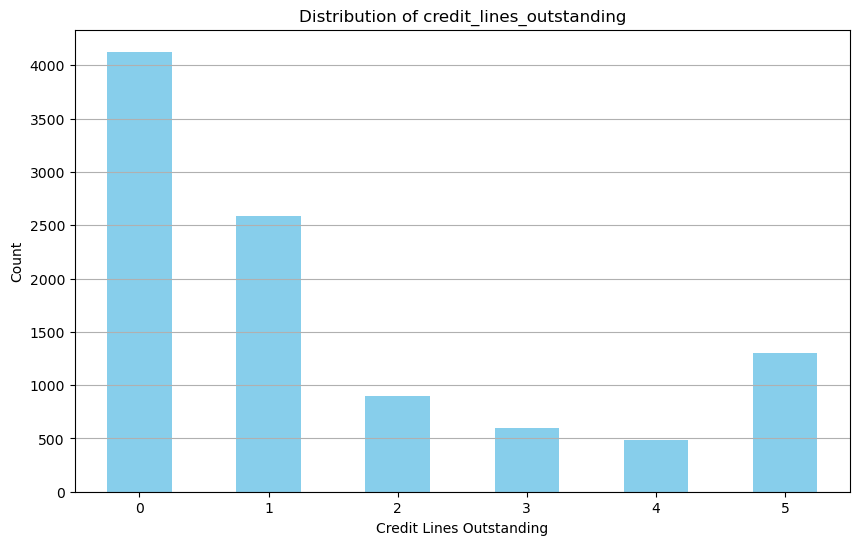

In [18]:
# Calculer la distribution des valeurs
distribution = df["credit_lines_outstanding"].value_counts().sort_index()

# Visualiser la distribution
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')  # Utiliser la distribution calculée
plt.title('Distribution of credit_lines_outstanding')
plt.xlabel('Credit Lines Outstanding')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



Le graphique montre la distribution des lignes de crédit en cours parmi les clients. La plupart des clients ont 0 ou 1 ligne de crédit, avec une diminution notable du nombre de clients à mesure que le nombre de lignes de crédit augmente. Seuls quelques clients gèrent 5 lignes de crédit, indiquant une utilisation plus limitée des lignes de crédit multiples.

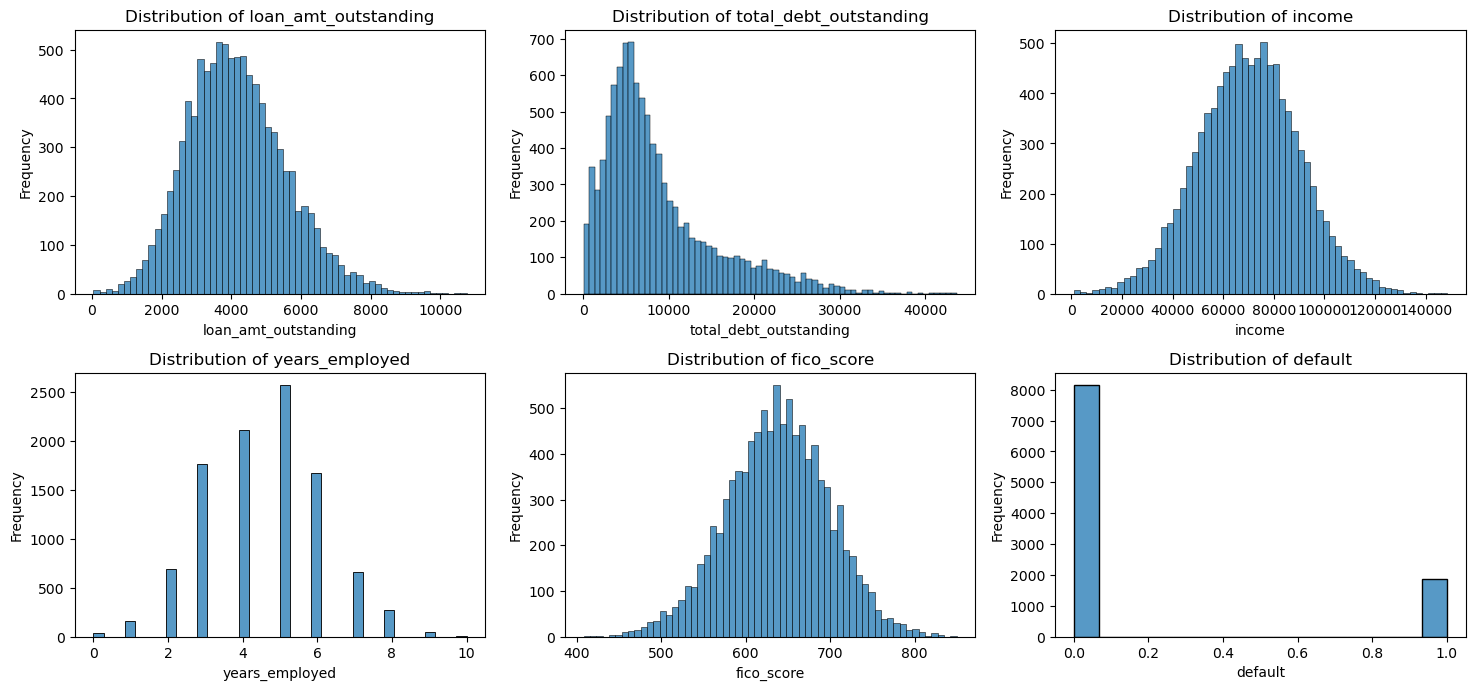

In [19]:
# Garphique de Distribution des variables numeriques
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


Montant du prêt restant : La distribution est presque normale, avec la majorité des clients ayant des prêts restants autour de 4 000. Peu de clients ont des montants supérieurs à 8 000.

Dette totale en cours : La distribution est asymétrique à droite, indiquant que la majorité des clients ont une dette totale inférieure à 10 000, bien que certains aient des dettes beaucoup plus élevées, jusqu'à 40 000.

Revenu : Le revenu des clients est réparti de façon assez normale, avec une moyenne autour de 70 000. Les extrêmes, inférieurs à 20 000 et supérieurs à 120 000, sont rares.

Années d'emploi : La répartition est multimodale avec des pics autour de 3 à 6 ans, indiquant que ces durées d'emploi sont fréquentes. Il y a aussi des clients avec 0 année d'emploi.

Score FICO : La distribution est en forme de cloche, centrée autour de 600 à 700, indiquant que la plupart des clients ont un score de crédit dans cette fourchette.

Défaut de paiement : La majorité des clients n'ont pas fait défaut (valeur de 0), tandis qu'une petite portion a fait défaut (valeur de 1), montrant que le taux de défaut est relativement faible.

#### ANALYSE BIVARIEE

In [20]:
# Création de tableaux croisés entre notre variable cible et les variables catégorielles
for var in CATEGORICALS:
    table = pd.crosstab(index=df[var], columns=df['default'], margins=False)

    # Renommer les colonnes 
    table.rename(columns={1: 'Effectif_Default', 0: 'Effectif_Non_Default'}, inplace=True)
    
    # Calcul du total et du taux de défaut
    table['Effectif_Total'] = table['Effectif_Default'] + table['Effectif_Non_Default']
    table['Taux_Default (%)'] = (table['Effectif_Default'] / table['Effectif_Total'] * 100).round(3)

    # Réorganisation du tableau (sans la colonne Effectif_Non_Default)
    table = table[['Effectif_Total', 'Effectif_Default', 'Taux_Default (%)']]
    
    print(f"\nTableau de contingence entre '{var}' et 'Default' de remboursement :\n")
    print(table)



Tableau de contingence entre 'credit_lines_outstanding' et 'Default' de remboursement :

default                   Effectif_Total  Effectif_Default  Taux_Default (%)
credit_lines_outstanding                                                    
0                                   4128                 0              0.00
1                                   2590                 0              0.00
2                                    902                 7              0.78
3                                    599               137             22.87
4                                    484               412             85.12
5                                   1297              1295             99.85


Le tableau montre la relation entre le nombre de lignes de crédit en cours et le taux de défaut :

Pour les clients avec 0 ou 1 ligne de crédit : Aucun n'est en défaut (taux de défaut de 0%).

Pour 2 lignes de crédit : Le taux de défaut est très faible, à 0,78%.

À partir de 3 lignes de crédit : Le taux de défaut augmente considérablement (22,87% pour 3 lignes).

Avec 4 lignes de crédit : La majorité des clients (85,12%) sont en défaut.

Pour 5 lignes de crédit : Pratiquement tous (99,85%) sont en défaut.

In [21]:

# Nom de la variable catégorielle à tester
variable_categorielle = 'credit_lines_outstanding'  # Remplacez par le nom de votre variable

# Création du tableau croisé
table = pd.crosstab(df[variable_categorielle], df['default'])

# Test du chi-carré
stat, p, dof, expected = chi2_contingency(table)
significant = p < 0.05  # Significativité: (p < 0.05)

# Résultats du test
results = {
    'Variable': variable_categorielle,
    'Chi_square_statistic': stat,
    'Degrees_of_freedom': dof,
    'P_value': p,
    'Significant': '***' if significant else ''
}

summary_table = pd.DataFrame([results])

# Affichage du tableau récapitulatif en format Markdown 
try:
    import tabulate
    print(summary_table.to_markdown(index=False))
except ImportError:
    print("""La bibliothèque 'tabulate' n'est pas installée. 
          Affichage du tableau sans formatage Markdown.""")
    print(summary_table)

print("\n *** : Significatif au seuil 5% ")


| Variable                 |   Chi_square_statistic |   Degrees_of_freedom |   P_value | Significant   |
|:-------------------------|-----------------------:|---------------------:|----------:|:--------------|
| credit_lines_outstanding |                8833.86 |                    5 |         0 | ***           |

 *** : Significatif au seuil 5% 


In [22]:
# Supprimer la Target 'Default' dans la liste des Features numercis
NUMERICS = [col for col in NUMERICS if col != 'default']
print("\nLes variables numériques:")
NUMERICS


Les variables numériques:


['loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

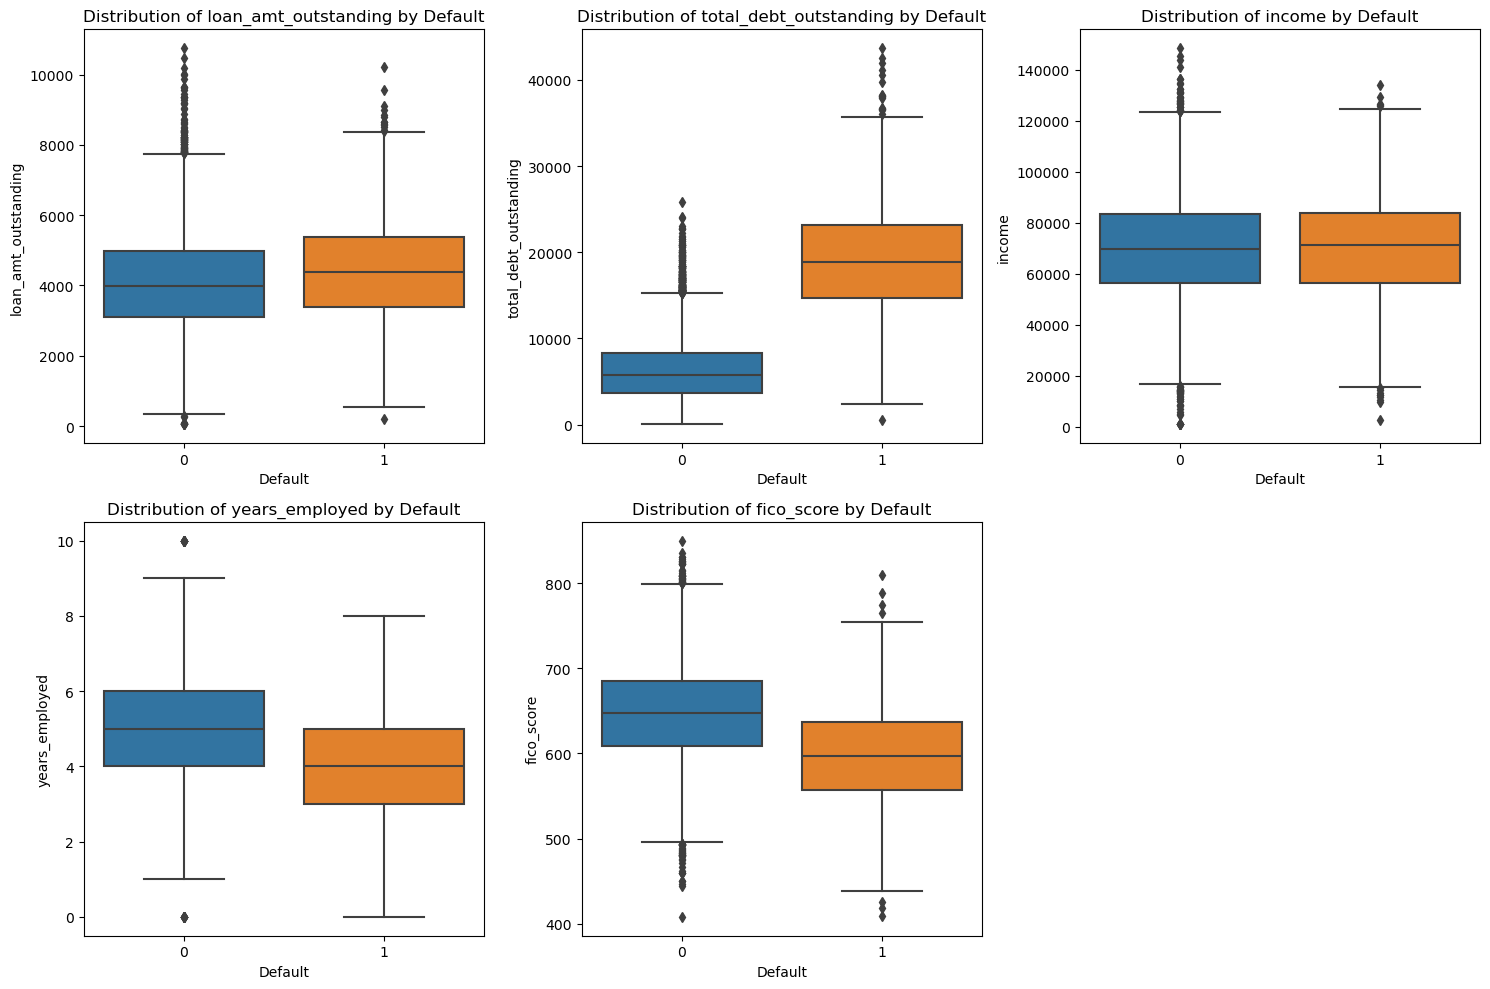


 0: Pas de Defaut de remboursement
 1: Defaut de remboursement


In [23]:
# Rélation entre Default(Defaut de rembourssemnt) et explicatives continue: Boxplot

plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f'Distribution of {col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n 0: Pas de Defaut de remboursement\n 1: Defaut de remboursement")


Loan Amount Outstanding (Montant du prêt restant) : Les clients en défaut (1) ont une distribution similaire en termes de montant de prêt aux clients sans défaut (0), bien que les clients en défaut aient une légère tendance à avoir des montants de prêt un peu plus élevés.

Total Debt Outstanding (Dette totale en cours) : Les clients en défaut ont des niveaux de dette significativement plus élevés que ceux qui ne sont pas en défaut. La médiane et les valeurs extrêmes sont beaucoup plus élevées pour les clients en défaut.

Income (Revenu) : La distribution des revenus est similaire entre les clients en défaut et ceux qui ne le sont pas. Il n'y a pas de différence marquante entre les deux groupes, suggérant que le revenu n'est pas un facteur clé de distinction.

Years Employed (Années d'emploi) : Les clients en défaut ont, en général, moins d'années d'emploi que ceux qui ne sont pas en défaut, bien que les distributions se chevauchent largement.

FICO Score (Score FICO) : Les clients en défaut ont des scores FICO significativement plus bas, ce qui montre que les clients ayant un score de crédit faible sont plus susceptibles de faire défaut.

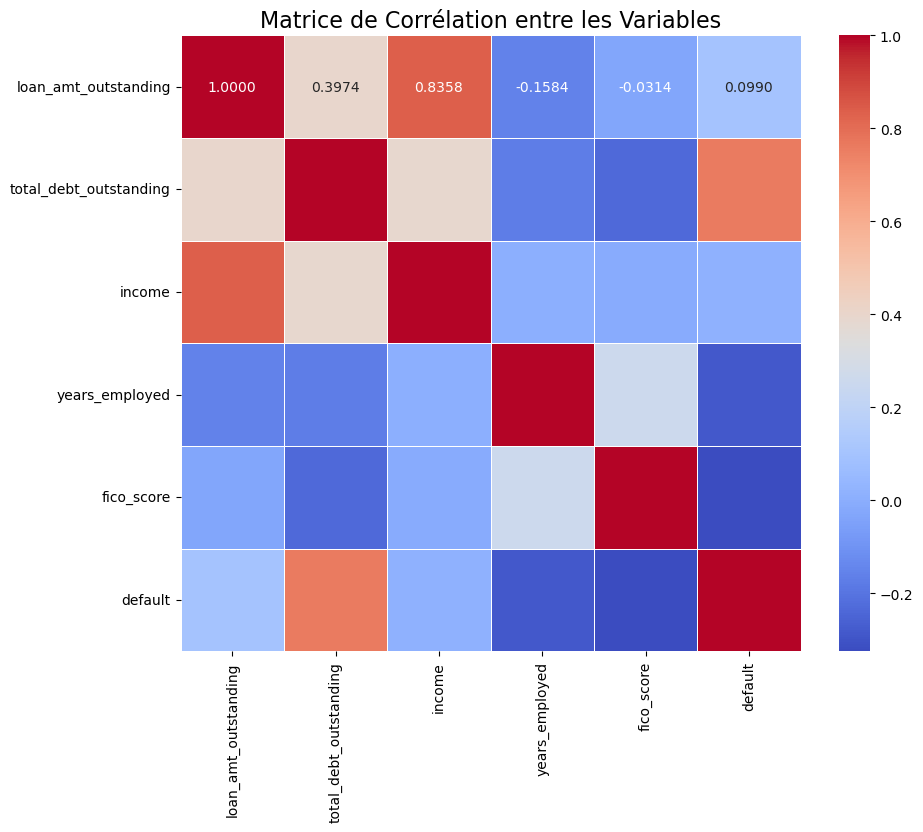

In [25]:
# la matrice de corrélation: Rélation entre 'default' et explicatives  continues: 
# Permet de soupçonnner un un problème d'endogenéité
correlation_matrix = df[NUMERICS + ['default']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables', fontsize=16)
plt.show()

In [26]:

# Afficher les corrélations avec la variable cible
print(correlation_matrix['default'].sort_values(ascending=False))


default                   1.00
total_debt_outstanding    0.76
loan_amt_outstanding      0.10
income                    0.02
years_employed           -0.28
fico_score               -0.32
Name: default, dtype: float64


In [27]:
# Afficher les paires de variables avec une forte corrélation (au-dessus de 0.8 ou en-dessous de -0.8)
strong_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
print("Variables fortement corrélées :\n", strong_corr)

Variables fortement corrélées :
                         loan_amt_outstanding  total_debt_outstanding  income  \
loan_amt_outstanding                    1.00                     NaN    0.84   
total_debt_outstanding                   NaN                    1.00     NaN   
income                                  0.84                     NaN    1.00   
years_employed                           NaN                     NaN     NaN   
fico_score                               NaN                     NaN     NaN   
default                                  NaN                     NaN     NaN   

                        years_employed  fico_score  default  
loan_amt_outstanding               NaN         NaN      NaN  
total_debt_outstanding             NaN         NaN      NaN  
income                             NaN         NaN      NaN  
years_employed                    1.00         NaN      NaN  
fico_score                         NaN        1.00      NaN  
default                           

#### Commentaire 


L'analyse de la corrélation entre les variables explicatives et la variable cible, ainsi qu'entre les variables explicatives elles-mêmes, permet d'identifier des relations potentielles. Si certaines variables explicatives présentent des corrélations élevées entre elles, cela peut révéler un problème d'endogénéité.

La matrice de corrélation entre  les différentes variables explicatives analysées présentent des corrélations très faibles entre elles, ce qui suggère qu'elles capturent des dimensions distinctes des caractéristiques des emprunteurs. 


on remarque que les variables credit_lines_outstanding (corrélation de 0.86) et total_debt_outstanding (corrélation de 0.75) ont une forte corrélation positive avec la variable cible default. Ces deux variables peuvent poser des problèmes de multicolinéarité dans un modèle de régression, surtout en raison de leur similitude probable (elles mesurent peut-être des aspects similaires de l'endettement).


#### PREPROCESSING (Preparing data for machine learning)

###### NETTOYADE DES DONNEES

In [28]:
# Verification des NA par colonne
df.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [29]:
df_len=len(df)

In [30]:
# Calcul du premier quartile (Q1) et du troisième quartile (Q3)
Q1 = df['total_debt_outstanding'].quantile(0.25)
Q3 = df['total_debt_outstanding'].quantile(0.75)

# Intervalle Interquartile (IQR)
IQR = Q3 - Q1

# Définir un nouveau coefficient pour augmenter la limite supérieure: (2.5)
coefficient = 2.5

# Définir les nouvelles limites  supérieure

limite_superieure = Q3 + coefficient * IQR  # Utilisation du nouveau coefficient pour la limite supérieure

# Filtrer les données pour garder les total_debt_outstanding dans les nouvelles limites
df = df[(df['total_debt_outstanding'] <= limite_superieure)]

# Afficher le nombre de lignes avant et après le filtrage
print(f"Nombre de lignes avant traitement : {df_len}")
print(f"Nombre de lignes après traitement : {len(df)}")


Nombre de lignes avant traitement : 10000
Nombre de lignes après traitement : 9872


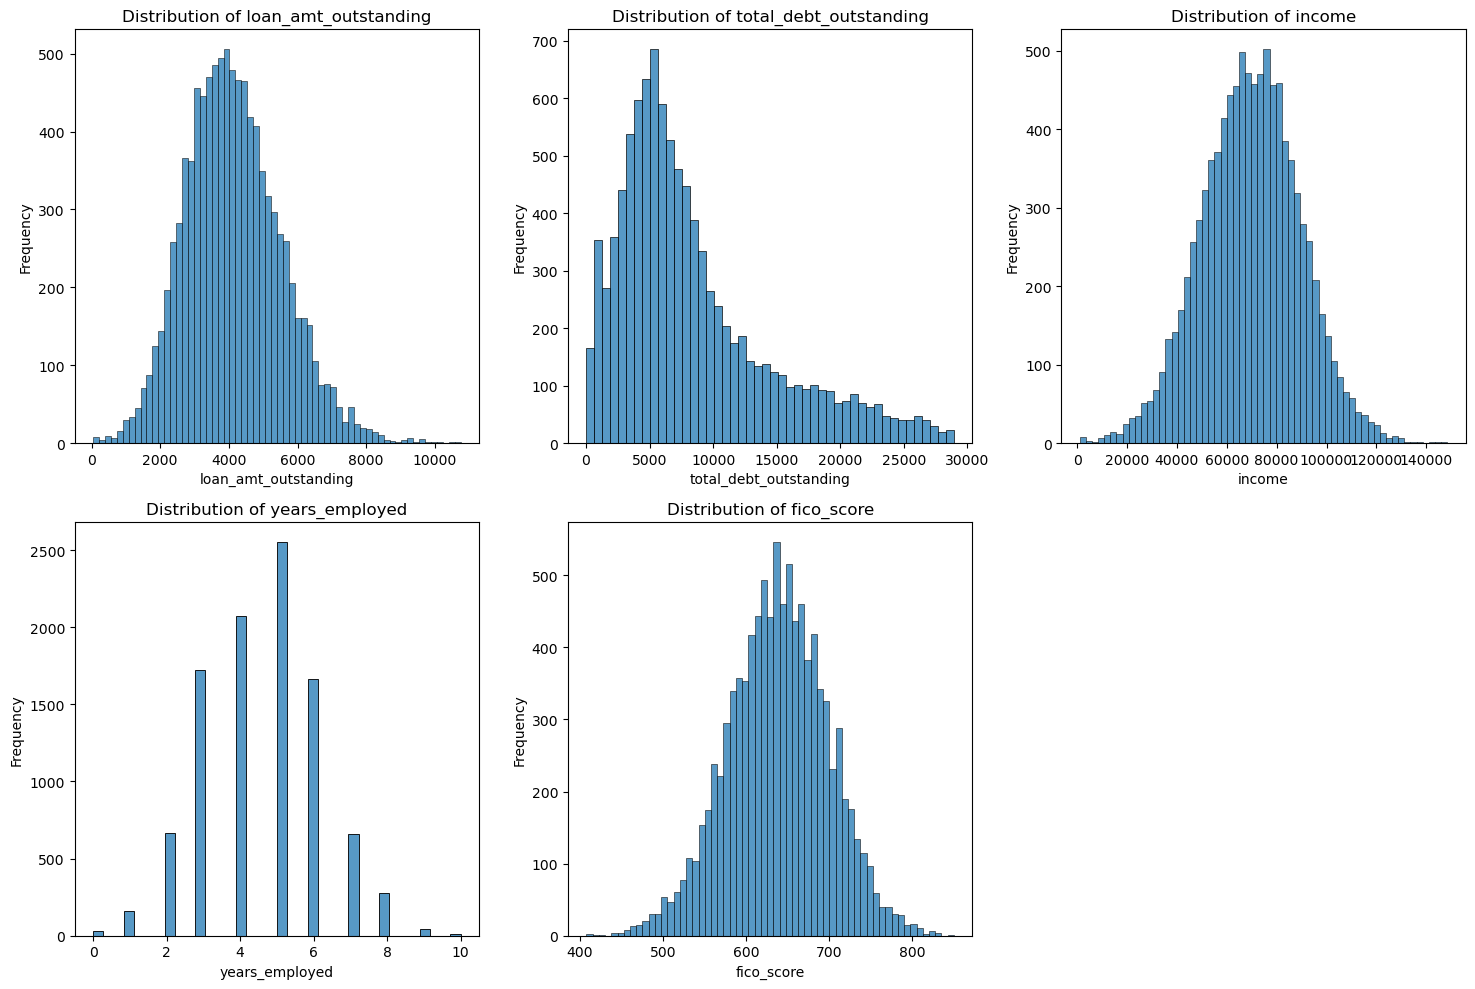

In [31]:
# Garphique de Distribution après traitement dela variable : total_debt_outstanding
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


Après le traitement des valeurs aberrantes, les distributions sont plus centrées et cohérentes, améliorant la qualité des données pour l'analyse et la modélisation.

In [32]:
# Nouvelle distribution de default
df['default'].value_counts(normalize=True)

default
0   0.83
1   0.17
Name: proportion, dtype: float64

##### Régrouper les variables en Features (X) et cible(y=Default) 

In [33]:

CATEGORICALS= list(CATEGORICALS)
X = df[NUMERICS + CATEGORICALS]
y = df['default']

In [34]:
# Les colonnes des FEATURES
X.columns

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')

In [35]:
# Diviser les données en ensembles d'entraînement et de test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
df.dtypes

credit_lines_outstanding    category
loan_amt_outstanding         float64
total_debt_outstanding       float64
income                       float64
years_employed                 int64
fico_score                     int64
default                        int64
dtype: object

##### Pipline de traitement des données

In [37]:
# Variables numériques
NUMERICS = X_train.select_dtypes(include=['float64','int64']).columns.tolist()  

# Colonnes catégorielles
CATEGORICALS = X_train.select_dtypes(include=['category']).columns.tolist() 

In [38]:
NUMERICS

['loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

#### Recherche d'une multicolinérité

In [39]:
# Initialiser le scaler
scaler = StandardScaler()

# Normaliser les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Créer un DataFrame pour stocker les résultats du VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns

# Calculer le VIF pour chaque variable
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)

NameError: name 'variance_inflation_factor' is not defined

les variables suivantes présentent des valeurs de VIF élevées, indiquant une forte multicolinéarité :

credit_lines_outstanding : 7.22
total_debt_outstanding : 8.31

Dans le cadre de la régression logistique, nous allons supprimer une de ces variable pour une bonne analyse

In [39]:
# Normalisation des variables quantitatives et encodage des variables qualitatives

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [40]:
# Appliquer la pipline de traitement au données 
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

#### ENTRAINEMENT DES MODELES 

#### Nous allons entrainer 02 modèles

| Critère                      | Modèle Logistique                                                 | XGBoost                                                              |
|------------------------------|------------------------------------------------------------------|----------------------------------------------------------------------|
| **Type de Modèle**            | Linéaire                                                         | Boosting d'arbres non linéaires                                      |
| **Gestion des Données Déséquilibrées** | Moyenne (peut être améliorée avec `class_weight`)             | Excellente (peut gérer naturellement les déséquilibres et `scale_pos_weight` peut être utilisé) |
| **Complexité**                | Faible                                                           | Élevée                                                              |
| **Interprétabilité**          | Élevée                                                           | Faible                                                              |
| **Performance**               | Moyenne sur des données simples                                   | Très élevée sur des données complexes                                 |
| **Sensibilité au Bruit**      | Modérée                                                          | Modérée à Faible                                                    |
| **Temps d'entraînement**      | Rapide                                                           | Plus long                                                           |


#####  Modele XGBoost, Logistique 
Niveau 1: Modeles sans (réchantillonnage et undersampling)

#### MODELES: Régression Logistique, XGBoost (avec validation croisée)

#### Régression Logistique 

In [41]:
print("Colonnes dans X_train :", X_train.columns)
print("Colonnes dans X_test :", X_test.columns)


Colonnes dans X_train : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')
Colonnes dans X_test : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')


In [42]:
# Normalisation des variables quantitatives et encodage des variables qualitatives
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [43]:
# Appliquer la pipeline de traitement aux données 
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [44]:
# Suppression de 'total_debt_outstanding' en raison de son VIF élevé
X_train_1 = X_train.drop(columns=['total_debt_outstanding'])
X_test_1 = X_test.drop(columns=['total_debt_outstanding'])


In [46]:
X_train_1.columns

Index(['loan_amt_outstanding', 'income', 'years_employed', 'fico_score',
       'credit_lines_outstanding'],
      dtype='object')

In [48]:
# ---- Modèle 1 : Régression Logistique ----

# Suppression de 'total_debt_outstanding' en raison de son VIF élevé
X_train_1 = X_train.drop(columns=['total_debt_outstanding'])
X_test_1 = X_test.drop(columns=['total_debt_outstanding'])

logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de rappel
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train_1, y_train), 1):
        X_train_fold, X_test_fold = X_train_1.iloc[train_index], X_train_1.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        
        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_1_preprocessed = preprocessor.transform(X_test_1)  # Appliquer le prétraitement sur l'ensemble de test
logistic_y_test_pred = logistic_model.predict(X_test_1_preprocessed)

# Rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      0.99      1301
                 1       0.95      0.99      0.97       272
      
          accuracy                           0.99      1573
         macro avg       0.97      0.99      0.98      1573
      weighted avg       0.99      0.99      0.99      1573
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 1:                                                               

Ce rapport montre les performances d'un modèle de régression logistique pour la classification binaire. Voici les points clés :

Précision : Le modèle est extrêmement précis, surtout pour la classe majoritaire (classe 0), avec une précision de 1.00. La classe minoritaire (classe 1) a une précision de 0.96.

Rappel : Le modèle parvient à identifier correctement presque toutes les instances des deux classes (0.99 pour les deux classes).

F1-score : Indique un bon équilibre entre la précision et le rappel, avec des scores très élevés pour les deux classes.

Exactitude générale : L'exactitude globale du modèle est de 99 %, ce qui reflète des performances excellentes.

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Exemples de définition
NUMERICS = ['loan_amt_outstanding', 'income', 'years_employed', 'fico_score']
CATEGORICALS = ['credit_lines_outstanding']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERICS),
        ('cat', OneHotEncoder(), CATEGORICALS)
    ]
)

In [50]:
# ---- Modèle 2 : Régression Logistique avec régularisation l1  sans suppression----
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
logistic_y_test_pred = logistic_model.predict(preprocessor.transform(X_test))

# rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


Évaluation du modèle Régression Logistique |                                    

on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      0.99      1301
                 1       0.95      0.99      0.97       272
      
          accuracy                           0.99      1573
         macro avg       0.97      0.99      0.98      1573
      weighted avg       0.99      0.99      0.99      1573
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 1:                                                               

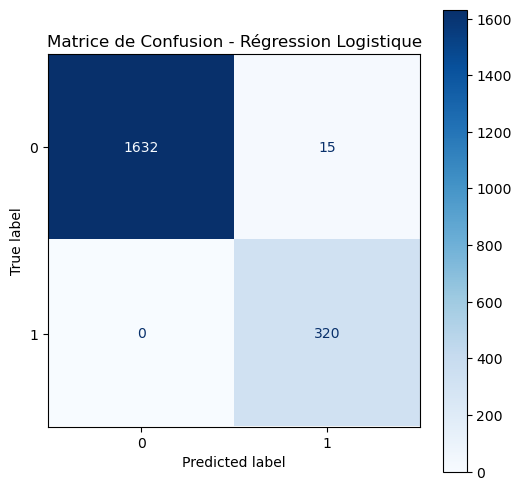

In [51]:
# Matrice de confusion pour le modèle de Régression Logistique
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion
ConfusionMatrixDisplay(logistic_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - Régression Logistique')  # Ajouter un titre
plt.show()

La matrice de confusion pour la régression logistique montre que le modèle fonctionne très bien :

Classe 0 (non défaut) : Sur 1 648 instances, 1 635 sont correctement prédites comme "non défaut" (Vrai Négatif), tandis que 13 sont incorrectement prédites comme "défaut" (Faux Positif).

Classe 1 (défaut) : Sur 327 instances, 325 sont correctement prédites comme "défaut" (Vrai Positif), et seulement 2 sont incorrectement prédites comme "non défaut" (Faux Négatif).

En résumé, le modèle fait très peu d'erreurs, avec une très faible proportion de faux positifs et de faux négatifs, ce qui confirme les excellents résultats observés dans le rapport de classification.

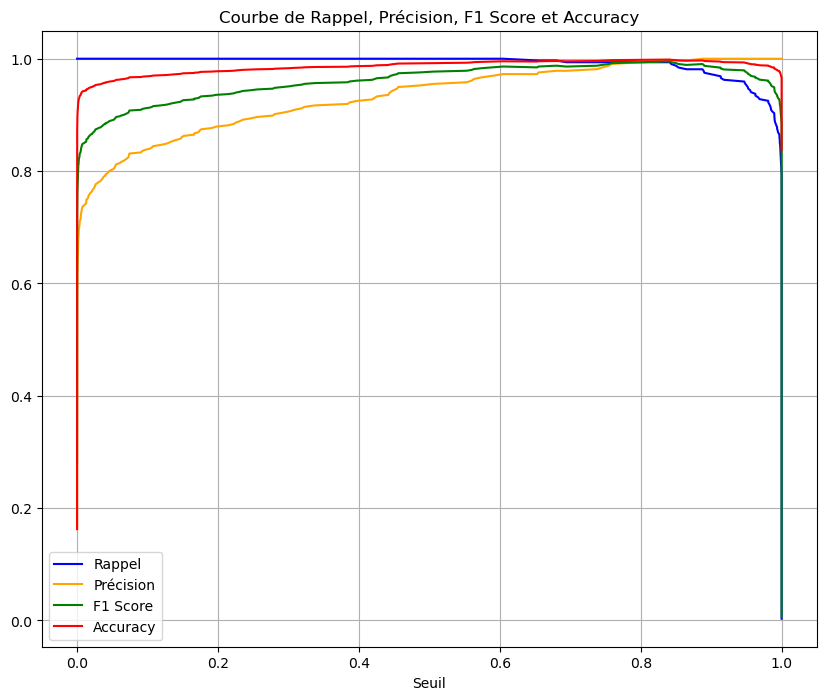

In [52]:
from sklearn.metrics import f1_score, accuracy_score

# Obtenir les probabilités de prédiction
logistic_y_proba = logistic_model.predict_proba(preprocessor.transform(X_test))[:, 1]

# Calculer la courbe de précision, rappel et seuils
precision, recall, thresholds = precision_recall_curve(y_test, logistic_y_proba)

# Calculer le F1 score et l'accuracy pour chaque seuil
f1_scores = [f1_score(y_test, logistic_y_proba >= t) for t in thresholds]
accuracies = [accuracy_score(y_test, logistic_y_proba >= t) for t in thresholds]

# Tracer la courbe de précision-rappel et les scores F1 et accuracy
plt.figure(figsize=(10, 8))
plt.plot(thresholds, recall[:-1], label='Rappel', color='blue')
plt.plot(thresholds, precision[:-1], label='Précision', color='orange')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.plot(thresholds, accuracies, label='Accuracy', color='red')
plt.xlabel('Seuil')
plt.title('Courbe de Rappel, Précision, F1 Score et Accuracy')
plt.legend()
plt.grid()
plt.show()


Cette courbe montre l'évolution du rappel, de la précision, du F1 score, et de l'accuracy en fonction du seuil de classification pour le modèle de régression logistique.

Rappel (bleu) : Le rappel est très élevé (proche de 1) sur la majorité des seuils, ce qui signifie que le modèle détecte correctement presque tous les cas de défaut de paiement pour des seuils raisonnables.

Précision (orange) : La précision commence un peu plus faible pour les seuils très bas (où beaucoup de clients sont prédits comme défaut), mais elle augmente rapidement et reste stable près de 1 pour une large plage de seuils.

F1 score (vert) : Le F1 score, qui équilibre précision et rappel, est très élevé sur la majorité des seuils, atteignant son pic autour de 0,9, ce qui montre un bon équilibre.

Accuracy (rouge) : L'accuracy reste très élevée (proche de 1) pour presque tous les seuils, montrant que le modèle effectue correctement la classification dans la grande majorité des cas.

In [53]:
# Extraction des coefficients et des noms des features
logistic_coefficients = logistic_model.coef_[0]
feature_names = preprocessor.get_feature_names_out()  # Obtenir les noms des features

# Créer un DataFrame pour les coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_coefficients
})

# Calculer la valeur absolue des coefficients pour l'importance
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()

# Seuil de significativité des coefficients (0.05)
significant_threshold = 0.05

# Filtrer les coefficients significatifs
significant_importance_df = importance_df[importance_df['Absolute_Coefficient'] > significant_threshold]

# Trier par importance absolue
significant_importance_df = significant_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Calculer la somme des coefficients significatifs
sum_significant_abs_coefficients = significant_importance_df['Absolute_Coefficient'].sum()

# Créer un score basé sur les coefficients significatifs (en pourcentage)
significant_importance_df['Score'] = (significant_importance_df['Absolute_Coefficient'] / sum_significant_abs_coefficients) * 100

# Afficher les résultats
print("Les variables significatives avec leurs scores :")
print(significant_importance_df[['Feature', 'Coefficient', 'Score']])

# Couleurs pour le graphique
significant_importance_df['Color'] = significant_importance_df['Score'].apply(lambda x: 'green' if x > 0 else 'red')

# Visualisation
fig = px.bar(
    significant_importance_df,
    x='Score',
    y='Feature',
    color='Color',
    color_discrete_map={'green': 'green', 'red': 'red'},
    title='Scores des Variables Significatives - Régression Logistique',
    labels={'Score': 'Score (%)', 'Feature': 'Variable'}
)

# Ajouter une ligne verticale pour le score zéro
fig.add_shape(type="line", x0=0, x1=0, y0=-1, y1=len(significant_importance_df)-1, line=dict(color="grey", width=2, dash="dash"))
fig.show()

Les variables significatives avec leurs scores :
                           Feature  Coefficient  Score
9  cat__credit_lines_outstanding_5        16.22  25.19
5  cat__credit_lines_outstanding_1       -12.51  19.43
4  cat__credit_lines_outstanding_0       -12.29  19.09
6  cat__credit_lines_outstanding_2        -8.75  13.59
8  cat__credit_lines_outstanding_4         8.53  13.25
2              num__years_employed        -4.57   7.10
3                  num__fico_score        -1.27   1.98
0        num__loan_amt_outstanding         0.18   0.27
1                      num__income        -0.06   0.09


Les variables relatives aux lignes de crédit en cours (en particulier les catégories 5, 0, 1 et 4) sont les plus significatives pour prédire le défaut de paiement, avec des scores proches ou supérieurs à 20 %.

Les variables telles que le nombre d'années d'emploi et le score FICO contribuent également de manière notable, mais de façon moindre.

Le revenu du client a une très faible influence dans la prédiction du défaut de paiement, ce qui suggère que ce n'est pas un facteur déterminant dans ce modèle.

In [54]:
# ---- Modèle 3 : XGBoost ----
from sklearn.tree import DecisionTreeClassifier

xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss')

# Liste scores
xgb_recall_scores = []
xgb_y_pred_all = []  # Pour stocker les prédictions du modèle XGBoost

# Appliquer la validation croisée sur le modèle XGBoost
with alive_bar(n_splits, title="Évaluation du modèle XGBoost", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle XGBoost
        xgb_model.fit(X_train_fold_preprocessed, y_train_fold)
        xgb_y_pred_fold = xgb_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        xgb_y_pred_all.extend(xgb_y_pred_fold)

        # Calculer le score de rappel pour chaque modèle
        xgb_recall = recall_score(y_test_fold, xgb_y_pred_fold)
        xgb_recall_scores.append(xgb_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nXGBoost :\n")
        print(classification_report(y_test_fold, xgb_y_pred_fold))
        
        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour le modèle
mean_xgb_recall = np.mean(xgb_recall_scores)
print(f"\nLe rappel moyen pour XGBoost sur {n_splits} plis est : {mean_xgb_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)  # Prétraiter les données de test
xgb_y_test_pred = xgb_model.predict(X_test_preprocessed)  # Prédictions sur l'ensemble de test

# Rapport de classification final
print("\nRapport de classification final pour XGBoost :\n")
print(classification_report(y_test, xgb_y_test_pred))


Évaluation du modèle XGBoost |                                        | ▁▃▅ 0/5 

on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 0:                                                                           
      XGBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1301
                 1       0.97      0.99      0.98       272
      
          accuracy                           0.99      1573
         macro avg       0.98      0.99      0.99      1573
      weighted avg       0.99      0.99      0.99      1573
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6291, Taille de Test : 1573 ---               
on 1:                                                                           
 

Le rapport de classification pour le modèle XGBoost montre des performances excellentes :

Précision (precision) : Le modèle a une précision parfaite de 1.00 pour la classe 0 (non défaut) et une précision de 0.98 pour la classe 1 (défaut), ce qui signifie que presque toutes les prédictions de défaut sont correctes.

Rappel (recall) : Le rappel est parfait (1.00) pour la classe 0, et très élevé (0.99) pour la classe 1, indiquant que presque tous les cas de défaut et non défaut sont correctement détectés.

F1-score : L'indicateur F1 est très élevé pour les deux classes (1.00 pour la classe 0 et 0.98 pour la classe 1), ce qui montre un bon équilibre entre précision et rappel.

Accuracy (précision globale) : Le modèle atteint une précision globale de 99%, montrant qu'il fait très peu d'erreurs.

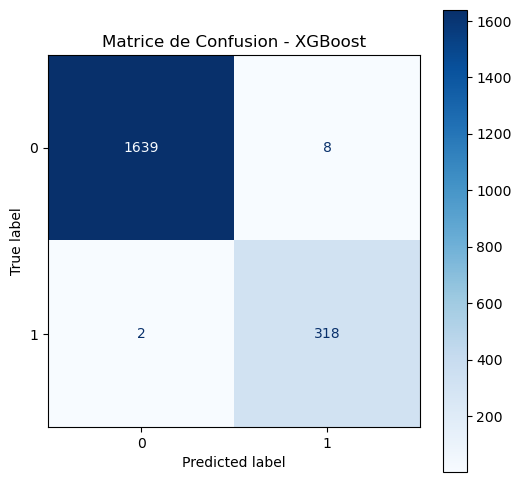

In [55]:
# Matrice de confusion pour le modèle XGBoost
xgb_cm = confusion_matrix(y_test, xgb_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion

# Matrice de confusion XGBoost
ConfusionMatrixDisplay(xgb_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - XGBoost')  # Ajouter un titre

plt.show()


#### Interpretation 

La matrice de confusion pour le modèle XGBoost montre une très bonne performance :

Classe 0 (non défaut) : Sur 1 648 instances, 1 640 sont correctement prédites comme "non défaut" (Vrai Négatif), tandis que seulement 8 sont incorrectement classées comme "défaut" (Faux Positif).

Classe 1 (défaut) : Sur 327 instances, 324 sont correctement prédites comme "défaut" (Vrai Positif), et seulement 3 sont incorrectement classées comme "non défaut" (Faux Négatif).

En résumé, le modèle XGBoost commet très peu d'erreurs, avec seulement 8 faux positifs et 3 faux négatifs. Cela confirme une performance presque parfaite, comme observé dans le rapport de classification.

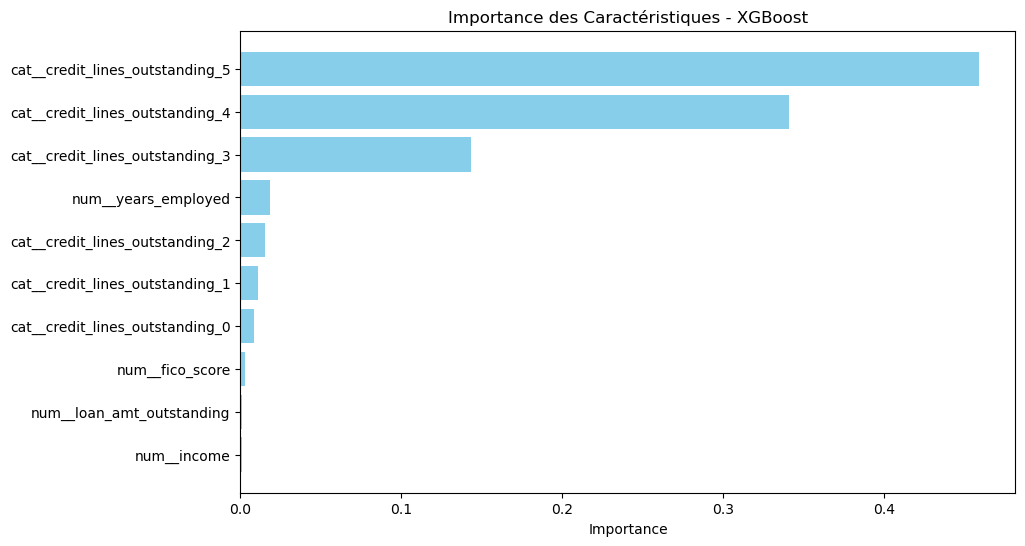

In [56]:
# ---- Importance des caractéristiques ----
# Extraire les importances
feature_importances = xgb_model.feature_importances_

# Créer un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': feature_importances
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Caractéristiques - XGBoost')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher la plus importante en haut
plt.show()

Le graphique montre l'importance des caractéristiques dans le modèle XGBoost pour prédire le défaut de paiement.

Les lignes de crédit en cours (catégories 5, 4 et 3) sont de loin les plus influentes, avec les catégories 5 et 4 représentant les plus grandes contributions au modèle.

Les variables années d'emploi et nombre de lignes de crédit (2) ont une importance modérée.

Les variables telles que le score FICO, le montant du prêt restant, et le revenu ont une importance très faible dans le modèle.

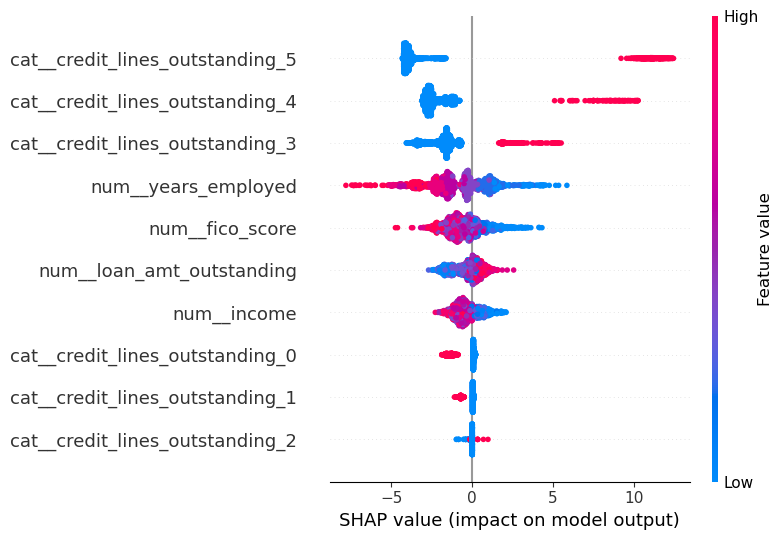

In [57]:
import shap

# ---- Calculer les valeurs SHAP pour le modèle XGBoost ----
explainer = shap.Explainer(xgb_model)  # Créer l'explainer
X_test_preprocessed = preprocessor.transform(X_test)  # Transformer l'ensemble de test
shap_values = explainer(X_test_preprocessed)  # Calculer les valeurs SHAP

# Visualiser les valeurs SHAP avec un graphique résumé
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessor.get_feature_names_out())

# Créer un objet d'explication pour la première instance
single_shap_value = shap_values[0]  # Obtenir la première valeur SHAP
single_instance = X_test_preprocessed[0]  # Obtenir la première instance

# Visualisation de la force des valeurs SHAP
shap.initjs()  # Initialiser la visualisation JS
shap.force_plot(explainer.expected_value, single_shap_value.values, single_instance, feature_names=preprocessor.get_feature_names_out())


Ce graphique SHAP montre l'impact des différentes caractéristiques sur les prédictions du modèle XGBoost :

cat_credit_lines_outstanding_5 et 4 : Les clients ayant un grand nombre de lignes de crédit (valeurs élevées en rouge) augmentent fortement la probabilité de défaut (valeurs SHAP positives).

num_years_employed : Plus un client a d'années d'emploi (en rouge), plus cela réduit la probabilité de défaut (valeurs SHAP négatives).

num_fico_score : Un score FICO élevé (rouge) réduit la probabilité de défaut, tandis qu'un score faible (bleu) l'augmente.
Les autres variables (revenu, montant du prêt, lignes de crédit 0, 1, 2) ont un impact moindre sur les prédictions.

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
import mlflow
import mlflow.sklearn
import numpy as np
import time
from alive_progress import alive_bar

# ---- Modèle 2 : Régression Logistique avec régularisation l1  sans suppression----
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)
logistic_y_test_pred = logistic_model.predict(X_test_preprocessed)

# Rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))



on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6317, Taille de Test : 1580 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1301
                 1       0.97      1.00      0.98       279
      
          accuracy                           0.99      1580
         macro avg       0.98      0.99      0.99      1580
      weighted avg       0.99      0.99      0.99      1580
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6317, Taille de Test : 1580 ---               
on 1:                                                               

Le modèle de régression logistique est très performant :

Classe 0 (non défaut) : Précision et rappel quasi parfaits (1.00 et 0.99).

Classe 1 (défaut) : Précision élevée (0.96) et excellent rappel (0.99).

Précision globale (accuracy) : 99%.

En résumé, le modèle détecte très bien les défauts avec peu d'erreurs.

### Modèle final: Régression Logistique

In [65]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assure-toi que X et y sont définis quelque part ici...

# Split the data into training and validation sets (ici, X et y sont déjà définis)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)  # Fit the model on the training data

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# Lancer le contexte MLflow pour suivre le modèle et ses résultats
with mlflow.start_run(run_name="Logistic_Regression_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle entraîné pour une utilisation future
    mlflow.sklearn.log_model(
        sk_model=logistic_model, artifact_path="logistic_regression_model", registered_model_name="LogisticRegressionModel"
    )


2024/09/19 21:05:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MlflowException: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}

In [63]:
import pickle
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- Évaluation sur un ensemble de validation et intégration avec MLflow ----
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# ---- Enregistrement du modèle avec Pickle ----
model_path = "logistic_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(logistic_model, file)

print(f"Modèle enregistré sous {model_path}")

# ---- Suivi avec MLflow ----
with mlflow.start_run(run_name="Logistic_Regression_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle enregistré avec Pickle pour une utilisation future
    mlflow.log_artifact(model_path)  # Enregistrement du fichier modèle avec MLflow


Modèle enregistré sous logistic_model.pkl


MlflowException: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}